In [1]:
import os
import pandas as pd
from corrLib import readdata
from utils import *
import numpy as np
import matplotlib.pyplot as plt

## 1 Manage the main log

Run the cell below to know what has or has not been done!

In [12]:
data_folder = '../Data'
log = pd.read_csv(os.path.join(data_folder, 'main_log.csv'), header=[0,1])
log#.head() # to see the whole table, comment out the .head()

params                                                              \
       Date                                     Subfolder  BC   MPP FPS   
0   7132021                          2021-07-13_17h17m24s  20  0.10  30   
1   7202021  1st-drop-tracking/2021-07-20_16h24m06s-mttry  32  0.10  30   
2   7202021     1st-drop-tracking/2021-07-20_16h25m35s-m2  32  0.10  30   
3   7202021     1st-drop-tracking/2021-07-20_16h27m01s-m3  32  0.10  30   
4   7202021     1st-drop-tracking/2021-07-20_16h28m21s-m4  32  0.10  30   
5   7202021     1st-drop-tracking/2021-07-20_16h29m43s-m5  32  0.10  30   
6   7202021        1st-drop-tracking/2021-07-20_16h31m06s  32  0.10  30   
7   7202021        1st-drop-tracking/2021-07-20_16h32m59s  32  0.10  30   
8   7202021        1st-drop-tracking/2021-07-20_16h34m28s  32  0.10  30   
9   7202021        1st-drop-tracking/2021-07-20_16h35m47s  32  0.10  30   
10  7202021        1st-drop-tracking/2021-07-20_16h42m46s  32  0.10  30   
11  7202021        1st-drop-tracking/2021-07-20_16h43m54s  32  0.10  30   
12  7202021        1st-drop-tracking/2021-07-20_16h44m58s  32  0.10  30   
13  7202021        1st-drop-tracking/2021-07-20_16h47m59s  32  0.10  30   
14  7202021        1st-drop-tracking/2021-07-20_16h50m22s  32  0.10  30   
15  7202021        1st-drop-tracking/2021-07-20_16h51m25s  32  0.10  30   
16  7212021                          2021-07-21_16h41m52s  23  0.16  30   
17  7212021                          2021-07-21_16h43m03s  23  0.16  30   
18  8042021                          2021-08-04_16h32m08s  24  0.10  30   
19  8042021                          2021-08-04_16h37m16s  24  0.10  30   
20  8122021                          2021-08-12_16h41m05s  23  0.10  30   
21  8122021                          2021-08-12_16h44m01s  23  0.10  30   
22  8122021                          2021-08-12_16h47m32s  23  0.10  30   
23  8122021                          2021-08-12_16h53m13s  23  0.10  30   
24  8132021                          2021-08-13_15h28m24s  24  0.10  30   
25  8132021                          2021-08-13_15h31m03s  24  0.10  30   
26  8132021                          2021-08-13_15h34m17s  24  0.10  30   
27  8132021                          2021-08-13_15h38m55s  24  0.10  30   
28  8132021                          2021-08-13_15h50m58s  24  0.10  30   
29  8132021                          2021-08-13_15h56m31s  24  0.10  30   
30  8132021                          2021-08-13_16h02m57s  24  0.10  30   
31  8132021                          2021-08-13_16h05m45s  24  0.10  30   
32  8132021                          2021-08-13_16h08m55s  24  0.10  30   
33  8132021                          2021-08-13_16h12m54s  24  0.10  30   
34  8132021                          2021-08-13_16h15m21s  24  0.10  30   
35  8132021                          2021-08-13_16h20m05s  24  0.10  30   
36  8132021                          2021-08-13_16h22m52s  24  0.10  30   
37  8132021                          2021-08-13_16h26m25s  24  0.10  30   
38  8132021                          2021-08-13_16h35m25s  24  0.10  30   

   analysis                                                      Visual  \
         ID     OD     a     b   c 2D-trajectory 3D-trajectory 2D-image   
0      34.5  100.5  45.4  49.0 NaN           1.0           1.0      1.0   
1       8.8   66.0  51.4  51.2 NaN           1.0           1.0      1.0   
2       9.0   69.5  51.3  52.0 NaN           1.0           1.0      1.0   
3       9.0   69.2  50.9  51.8 NaN           1.0           1.0      1.0   
4       9.1   69.3  51.2  51.2 NaN           1.0           1.0      1.0   
5       8.6   65.2  51.7  51.7 NaN           1.0           1.0      1.0   
6       8.9   65.5  51.7  51.0 NaN           1.0           1.0      1.0   
7       9.2   67.7  51.7  51.2 NaN           1.0           1.0      1.0   
8       8.7   67.6  51.5  51.3 NaN           1.0           1.0      1.0   
9       8.9   65.1  52.2  51.4 NaN           1.0           1.0      1.0   
10      8.4   71.7  51.8  51.

### Update the log

- frame rate from RawImageInfo.txt
- check the dropSize.xlsx for a, b, ID and OD
- check traj.csv and xyz-traj.csv for 2D and 3D trajectory
- check key visualization files
    - 2D-image: "2d-traj.jpg"
    - 3D-projection: "3d-traj-animation.avi"
    - 3D-outRef: "3d-traj-RVRef.avi"

In [26]:
img_folder = '/home/zhengyang/data/DE'

for num, i in log.iterrows():
    sf = os.path.join(img_folder, '{:08d}'.format(i[('params', 'Date')]), i[('params', 'Subfolder')])
    # RawImageInfo.txt
    imageInfo_dir = os.path.join(sf, 'RawImageInfo.txt')
    if os.path.exists(imageInfo_dir) == True:
        with open(imageInfo_dir, 'r') as f:
            fps = int(f.readline())
        log[('params', 'FPS')].at[num] = fps

    # dropSize.xlsx
    dropSize_dir = os.path.join(sf, 'dropSize.xlsx')
    if os.path.exists(dropSize_dir) == True:
        
        outer, inner, a, b = read_dropSize(dropSize_dir)
        log[('analysis', 'OD')].at[num] = outer
        log[('analysis', 'ID')].at[num] = inner
        log[('analysis', 'a')].at[num] = a
        log[('analysis', 'b')].at[num] = b
    
    # traj.csv
    traj_dir = os.path.join(sf, 'crop_HoughCircles', 'traj.csv')
    log[('analysis', '2D-trajectory')].at[num] = int(os.path.exists(traj_dir))
    # xyz-traj.csv
    xyz_dir = os.path.join(sf, 'crop_HoughCircles', 'xyz-traj.csv')
    log[('analysis', '3D-trajectory')].at[num] = int(os.path.exists(xyz_dir))
    # 2d-image.jpg
    image_2D_dir = os.path.join(sf, 'crop_HoughCircles', '2d-image.jpg')
    log[('Visual', '2D-image')].at[num] = int(os.path.exists(image_2D_dir))
    # 3d-traj-animation.avi
    projection_3D_dir = os.path.join(sf, 'crop_HoughCircles', '3d-traj-animation.avi')
    log[('Visual', '3D-projection')].at[num] = int(os.path.exists(projection_3D_dir))
    # 3d-traj-RVRef.avi
    outRef_3D_dir = os.path.join(sf, 'crop_HoughCircles', '3d-traj-RVRef.avi')
    log[('Visual', '3D-outRef')].at[num] = int(os.path.exists(outRef_3D_dir))    

In [27]:
log

params                                                              \
       Date                                     Subfolder  BC   MPP FPS   
0   7132021                          2021-07-13_17h17m24s  20  0.10  30   
1   7202021  1st-drop-tracking/2021-07-20_16h24m06s-mttry  32  0.10  30   
2   7202021     1st-drop-tracking/2021-07-20_16h25m35s-m2  32  0.10  30   
3   7202021     1st-drop-tracking/2021-07-20_16h27m01s-m3  32  0.10  30   
4   7202021     1st-drop-tracking/2021-07-20_16h28m21s-m4  32  0.10  30   
5   7202021     1st-drop-tracking/2021-07-20_16h29m43s-m5  32  0.10  30   
6   7202021        1st-drop-tracking/2021-07-20_16h31m06s  32  0.10  30   
7   7202021        1st-drop-tracking/2021-07-20_16h32m59s  32  0.10  30   
8   7202021        1st-drop-tracking/2021-07-20_16h34m28s  32  0.10  30   
9   7202021        1st-drop-tracking/2021-07-20_16h35m47s  32  0.10  30   
10  7202021        1st-drop-tracking/2021-07-20_16h42m46s  32  0.10  30   
11  7202021        1st-drop-tracking/2021-07-20_16h43m54s  32  0.10  30   
12  7202021        1st-drop-tracking/2021-07-20_16h44m58s  32  0.10  30   
13  7202021        1st-drop-tracking/2021-07-20_16h47m59s  32  0.10  30   
14  7202021        1st-drop-tracking/2021-07-20_16h50m22s  32  0.10  30   
15  7202021        1st-drop-tracking/2021-07-20_16h51m25s  32  0.10  30   
16  7212021                          2021-07-21_16h41m52s  23  0.16  30   
17  7212021                          2021-07-21_16h43m03s  23  0.16  30   
18  8042021                          2021-08-04_16h32m08s  24  0.10  30   
19  8042021                          2021-08-04_16h37m16s  24  0.10  30   
20  8122021                          2021-08-12_16h41m05s  23  0.10  30   
21  8122021                          2021-08-12_16h44m01s  23  0.10  30   
22  8122021                          2021-08-12_16h47m32s  23  0.10  30   
23  8122021                          2021-08-12_16h53m13s  23  0.10  30   
24  8132021                          2021-08-13_15h28m24s  24  0.10  30   
25  8132021                          2021-08-13_15h31m03s  24  0.10  30   
26  8132021                          2021-08-13_15h34m17s  24  0.10  30   
27  8132021                          2021-08-13_15h38m55s  24  0.10  30   
28  8132021                          2021-08-13_15h50m58s  24  0.10  30   
29  8132021                          2021-08-13_15h56m31s  24  0.10  30   
30  8132021                          2021-08-13_16h02m57s  24  0.10  30   
31  8132021                          2021-08-13_16h05m45s  24  0.10  30   
32  8132021                          2021-08-13_16h08m55s  24  0.10  30   
33  8132021                          2021-08-13_16h12m54s  24  0.10  30   
34  8132021                          2021-08-13_16h15m21s  24  0.10  30   
35  8132021                          2021-08-13_16h20m05s  24  0.10  30   
36  8132021                          2021-08-13_16h22m52s  24  0.10  30   
37  8132021                          2021-08-13_16h26m25s  24  0.10  30   
38  8132021                          2021-08-13_16h35m25s  24  0.10  30   

   analysis                                                      Visual  \
         ID     OD     a     b   c 2D-trajectory 3D-trajectory 2D-image   
0      34.5  100.5  45.4  49.0 NaN           1.0           1.0      1.0   
1       8.8   66.0  51.4  51.2 NaN           1.0           1.0      1.0   
2       9.0   69.5  51.3  52.0 NaN           1.0           1.0      1.0   
3       9.0   69.2  50.9  51.8 NaN           1.0           1.0      1.0   
4       9.1   69.3  51.2  51.2 NaN           1.0           1.0      1.0   
5       8.6   65.2  51.7  51.7 NaN           1.0           1.0      1.0   
6       8.9   65.5  51.7  51.0 NaN           1.0           1.0      1.0   
7       9.2   67.7  51.7  51.2 NaN           1.0           1.0      1.0   
8       8.7   67.6  51.5  51.3 NaN           1.0           1.0      1.0   
9       8.9   65.1  52.2  51.4 NaN           1.0           1.0      1.0   
10      8.4   71.7  51.8  51.

### Save the log

In [28]:
log.to_csv(os.path.join(data_folder, 'main_log.csv'), index=False)

### Add entries to log

In [5]:
folder = '/home/zhengyang/data/DE/08122021'
l = readdata(folder, 'raw').sort_values(by='Dir')
for num, i in l.iterrows():
    print(os.path.relpath(os.path.split(i.Dir)[0], folder))
# copy to the csv spreadsheet

2021-08-12_16h32m19s
2021-08-12_16h37m10s
2021-08-12_16h41m05s
2021-08-12_16h44m01s
2021-08-12_16h47m32s
2021-08-12_16h53m13s


## 2 Experiment overview

Plot parameter distributions (histogram) to have a broad idea of what experiment is lacking.

Text(0, 0.5, 'Histogram')

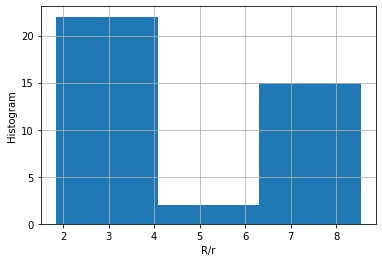

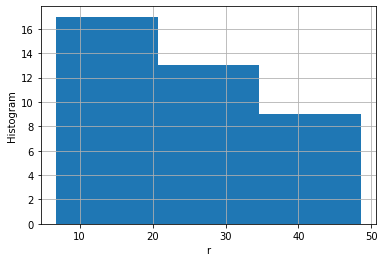

In [11]:
data_folder = '../Data'
log = pd.read_csv(os.path.join(data_folder, 'main_log.csv'), header=[0,1])
r = log[('analysis', 'OD')] / log[('analysis', 'ID')]
plt.figure()
r.hist(bins=3)
plt.ylabel("Histogram")
plt.xlabel("R/r")
plt.figure()
log[('analysis', 'ID')].hist(bins=3)
plt.xlabel('r')
plt.ylabel('Histogram')

## 3 A Class for quickly accessing log entries

In [8]:
class DE_log(pd.DataFrame):
    def __init__(self, log=log):
        '''log_data is a DataFrame containing the experiment log
        '''
        self.main_log = log
    def size_ratio(self, ratio_range):
        assert(len(ratio_range)==2)
        ratio = self.main_log[('params', 'OD')] / self.main_log[('params', 'ID')]
        return self.main_log.loc[(ratio>=ratio_range[0])&(ratio<ratio_range[1])]

In [6]:
log = pd.read_csv(os.path.join('../Data', 'main_log.csv'), header=[0, 1])